In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from sklearn import linear_model
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
breast_cancer = pd.read_csv('Breast_Cancer_Wisconsin.csv')

In [3]:
breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Son sütunda anlamsız bir veri bulunmaktadır. Bunu ve id'yi drop edelim.

In [4]:
breast_cancer.drop(columns=['id', 'Unnamed: 32'], axis=1,inplace=True)

In [5]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Yalnızca diagnosis sütunu object. Bunu inceleyelim.

In [7]:
breast_cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

**Bunları sayısallaştıralım. M:Kötü huylu , B:İyi huylu. O yüzden M'yi 1, B'yi yapalım.**

In [8]:
breast_cancer["diagnosis"] = breast_cancer.diagnosis.replace({'M':1, "B":0})

In [9]:
breast_cancer.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


Şimdi bu hedef veriyi görselleştirelim.

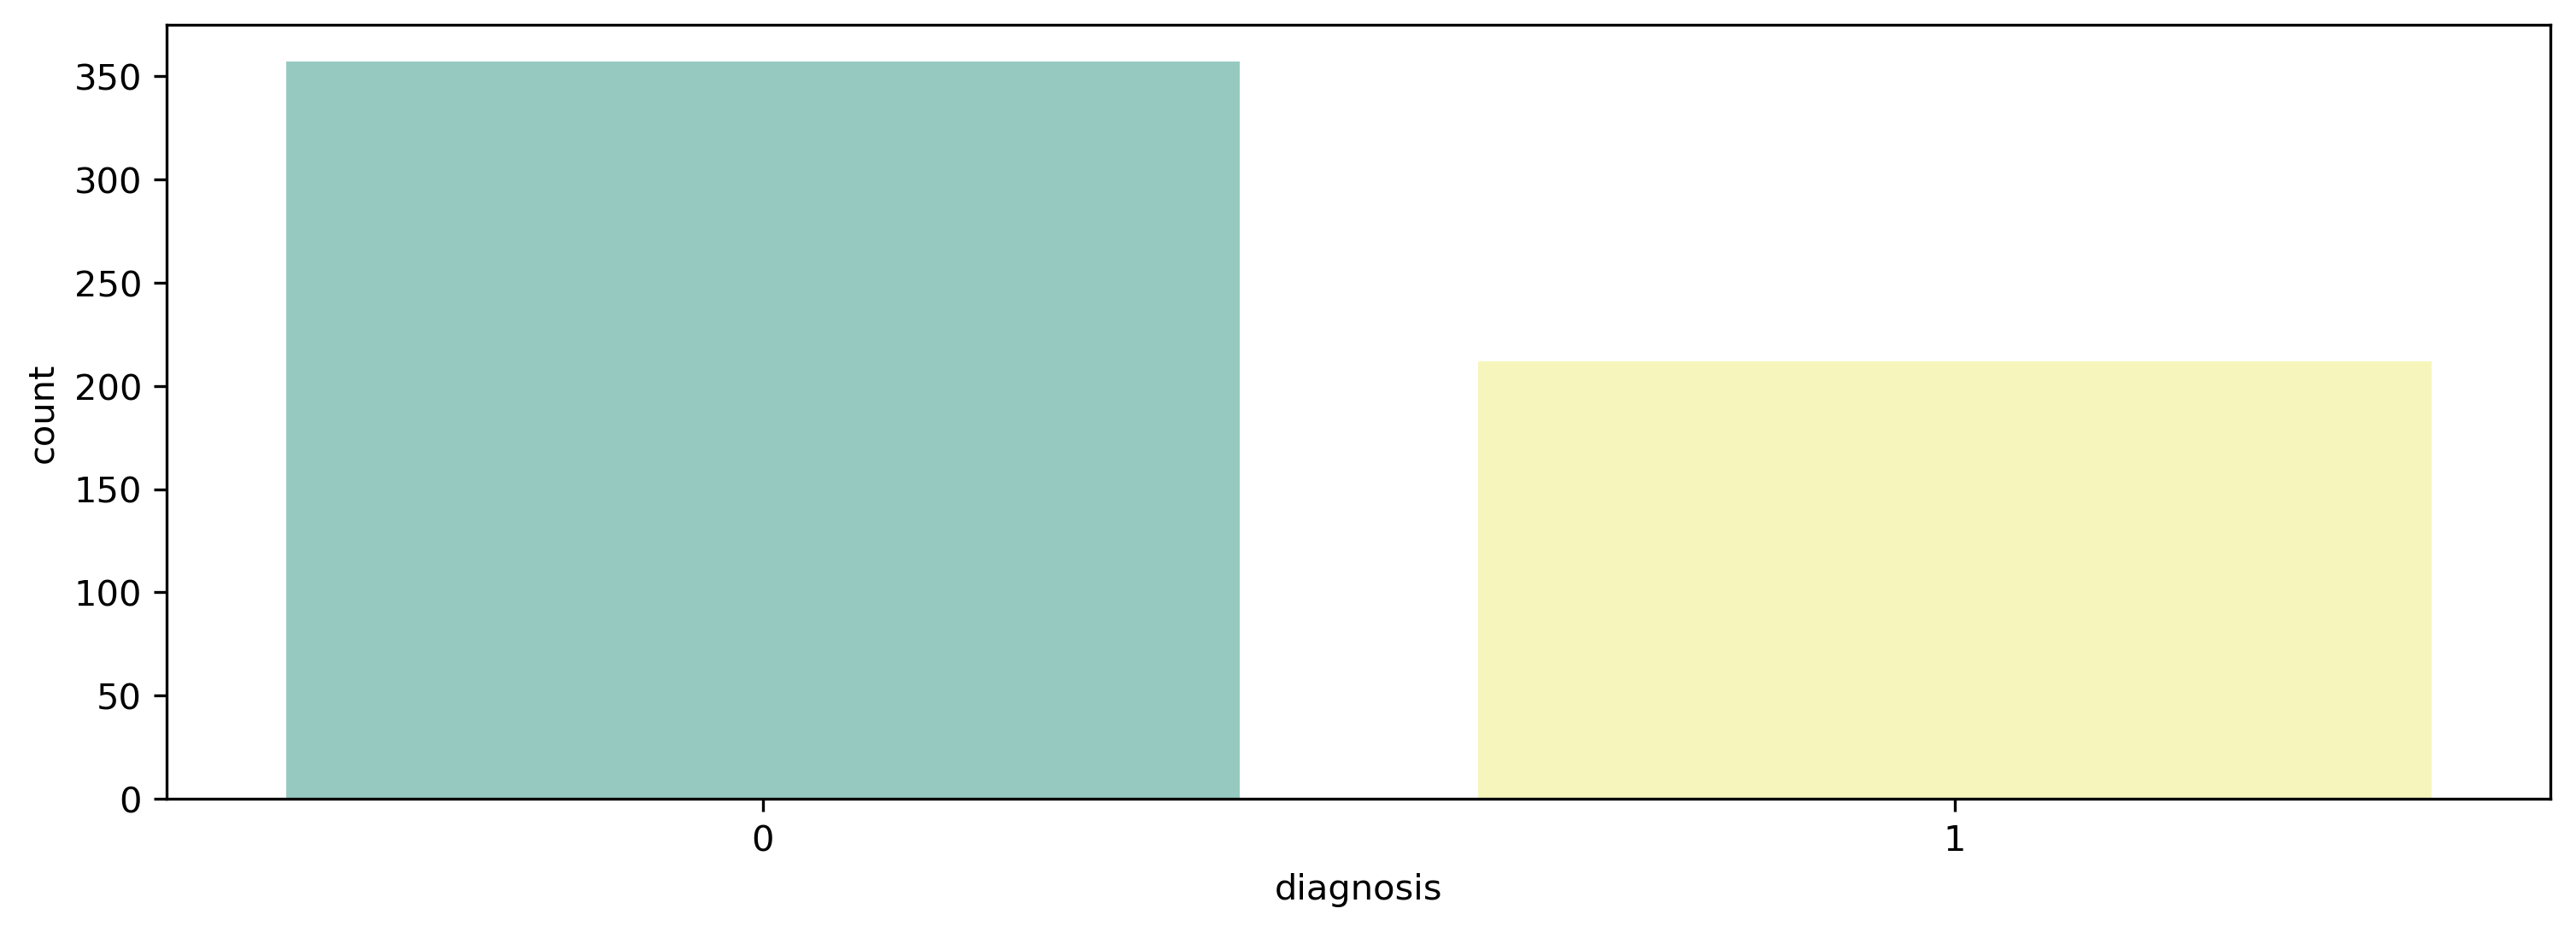

In [10]:
plt.figure(figsize=(12,4), dpi = 300)
sns.countplot(x = 'diagnosis', data = breast_cancer, palette="Set3")
plt.xticks(rotation = 0)
plt.show()

Değerler birbirine yakın gözüküyor ancak iyi huylunun sayısı biraz daha fazla.

In [11]:
breast_cancer.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Şimdi Lojistik Regresyon yapalım.**

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [13]:
from sklearn.model_selection import train_test_split
y = breast_cancer['diagnosis']
X = breast_cancer.drop(columns=['diagnosis'], axis=1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [14]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [15]:
egitim_dogruluk = log_reg.score(X_train, y_train)
test_dogruluk = log_reg.score(X_test, y_test)
print('One-vs-rest', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

One-vs-rest
--------------------
Modelin eğitim verisindeki doğruluğu : 0.95
Modelin test verisindeki doğruluğu   : 0.95


Softmax ile deneyelim bir de.

In [16]:
log_reg_mnm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_mnm.fit(X_train, y_train)
egitim_dogruluk = log_reg_mnm.score(X_train, y_train)
test_dogruluk = log_reg_mnm.score(X_test, y_test)
print('Multinomial (Softmax)', '-'*20, 
      'Modelin eğitim verisindeki doğruluğu : {:.2f}'.format(egitim_dogruluk), 
      'Modelin test verisindeki doğruluğu   : {:.2f}'.format(test_dogruluk), sep='\n')

Multinomial (Softmax)
--------------------
Modelin eğitim verisindeki doğruluğu : 0.96
Modelin test verisindeki doğruluğu   : 0.94


**Modelin eğitim verisindeki doğruluk arttı ancak testteki doğruluk bir miktar düştü.**

C değerlerini değiştirerek modelin doğruluk oranlarının değişimine bakalım.

In [17]:
C_değerleri = [10**a for a in range(-2,6)]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])

dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

for c in C_değerleri:
    
    lr = LogisticRegression(penalty = 'l2', C = c, random_state = 0)
    lr.fit(X_train,y_train)
    dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
                                                    'Eğitim Doğruluğu' : lr.score(X_train, y_train),
                                                    'Test Doğruluğu': lr.score(X_test, y_test)
                                                    }, ignore_index=True)
display(dogruluk_değerleri)

,C Değeri,Eğitim Doğruluğu,Test Doğruluğu
0,0.01,0.936264,0.929825
1,0.10,0.940659,0.947368
2,1.00,0.947253,0.947368
3,10.00,0.947253,0.938596
4,100.00,0.942857,0.947368
5,1000.00,0.945055,0.938596
6,10000.00,0.945055,0.947368
7,100000.00,0.945055,0.947368


C değeri olarak 10000 almak mantıklı bir seçenek olacaktır.

**Şimdi performans ölçüm metriklerini deneyelim.**

In [18]:
kanser_tahmin_modeli = LogisticRegression()
kanser_tahmin_modeli.fit(X_train, y_train)

tahmin_eğitim = kanser_tahmin_modeli.predict(X_train)
tahmin_test = kanser_tahmin_modeli.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_train, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [20]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[277  10]
 [ 14 154]]
Hata Matrisi (Test verileri)
------------------------------
[[68  2]
 [ 4 40]]


In [21]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 68
Doğru pozitif sayısı   : 40
Yanlış pozitif sayısı  : 2
Yanlış negatif sayısı  : 4


**Yanlış pozitif ve yanlış negatif sayıları gerçekten düşük.**

**Accuracy Score ve Hata Oranını Hesaplayalım.**

In [22]:
from sklearn.metrics import accuracy_score
print("accuracy değeri  : ", accuracy_score(y_test, tahmin_test))
print("Hata oranı       : ", 1-accuracy_score(y_test, tahmin_test))

accuracy değeri  :  0.9473684210526315
Hata oranı       :  0.052631578947368474


**Precision değerine bakalım.**

In [23]:
from sklearn.metrics import precision_score

print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))   #tp/(tp+fp)

precision_score() değeri        :  0.9523809523809523


Yani kanser dediğimiz hastaların ne kadarı gerçekten kanser, bunu hesapladık. Yüzde 95 oranında doğru tahmin etmekteymişiz.

**Recall değerine bakalım.**

In [24]:
from sklearn.metrics import recall_score

print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))    #tp/(tp+fn)

recall_score() değeri        :  0.9090909090909091


Yani gerçekte kanser olanların ne kadarını doğru tahmin ettik bunu göstermekte.Yüzde 90 oranında doğru tahmin ettik.

**F1 skoruna bakalım.**

In [25]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


#print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

f1_score() değeri     :  0.9302325581395349


**ROC/AUC eğrilerine bakalım.**

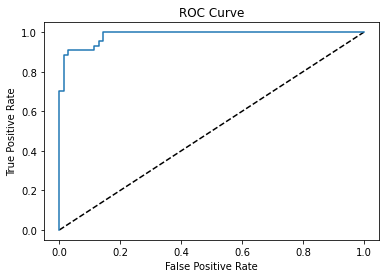

AUC Değeri :  0.9847402597402598


In [26]:
tahmin_test_ihtimal = kanser_tahmin_modeli.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

**AUC değeri 1'e yakın çıktı. Bu gerçekten iyi bir oran.**

**Örneklem arttırarak ve azaltarak değerlerin nasıl değiştiğine bakalım.Önce örneklem arttırmayı deneyelim.**

In [27]:
from sklearn.utils import resample
iyi_huylu = breast_cancer[breast_cancer.diagnosis == 0]
kotu_huylu = breast_cancer[breast_cancer.diagnosis == 1]

kotu_huylu_arttirilmis = resample(kotu_huylu,
                                     replace = True,
                                     n_samples = len(iyi_huylu),
                                     random_state = 111)

In [28]:
artırılmıs_df = pd.concat([iyi_huylu, kotu_huylu_arttirilmis])
artırılmıs_df.diagnosis.value_counts()

0    357
1    357
Name: diagnosis, dtype: int64

Artık iki sınıfında sayısı aynı oldu.Şimdi modeli tekrar eğitip sonuçlara bakalım.

In [29]:
from sklearn.metrics import classification_report

In [30]:
def model_olustur(X, y):
    X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111, stratify = y)
    logreg_model = LogisticRegression()
    logreg_model.fit(X_eğitim, y_eğitim)

    tahmin_eğitim = logreg_model.predict(X_eğitim)
    tahmin_test = logreg_model.predict(X_test)
    hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
    hata_matrisi_test = confusion_matrix(y_test, tahmin_test)
    print("Modelin doğruluk değeri : ",  logreg_model.score(X_test, y_test))
    print("----------------------------------------------------------")
    print("Eğitim veri kümesi")
    print(classification_report(y_eğitim,tahmin_eğitim) )
    print("Test veri kümesi")
    print(classification_report(y_test,tahmin_test) )
    return  None

In [31]:
X = artırılmıs_df.drop('diagnosis', axis=1)
y = artırılmıs_df['diagnosis']
model_olustur(X,y)

Modelin doğruluk değeri :  0.951048951048951
----------------------------------------------------------
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       285
           1       0.95      0.94      0.94       286

    accuracy                           0.94       571
   macro avg       0.94      0.94      0.94       571
weighted avg       0.94      0.94      0.94       571

Test veri kümesi
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        72
           1       0.97      0.93      0.95        71

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



**Şimdi örneklem azaltmayı deneyelim.**

In [32]:
from sklearn.utils import resample
iyi_huylu = breast_cancer[breast_cancer.diagnosis == 0]
kotu_huylu = breast_cancer[breast_cancer.diagnosis == 1]

iyi_huylu_azaltilmis = resample(iyi_huylu,
                                     replace = True,
                                     n_samples = len(kotu_huylu),
                                     random_state = 111)

In [33]:
azaltilmis_df = pd.concat([kotu_huylu, iyi_huylu_azaltilmis])
azaltilmis_df.diagnosis.value_counts()

0    212
1    212
Name: diagnosis, dtype: int64

In [34]:
X = azaltilmis_df.drop('diagnosis', axis=1)
y = azaltilmis_df['diagnosis']
model_olustur(X,y)

Modelin doğruluk değeri :  0.9294117647058824
----------------------------------------------------------
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       169
           1       0.96      0.95      0.96       170

    accuracy                           0.96       339
   macro avg       0.96      0.96      0.96       339
weighted avg       0.96      0.96      0.96       339

Test veri kümesi
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        43
           1       0.97      0.88      0.93        42

    accuracy                           0.93        85
   macro avg       0.93      0.93      0.93        85
weighted avg       0.93      0.93      0.93        85



**Şimdi bunları karşılaştıralım.**

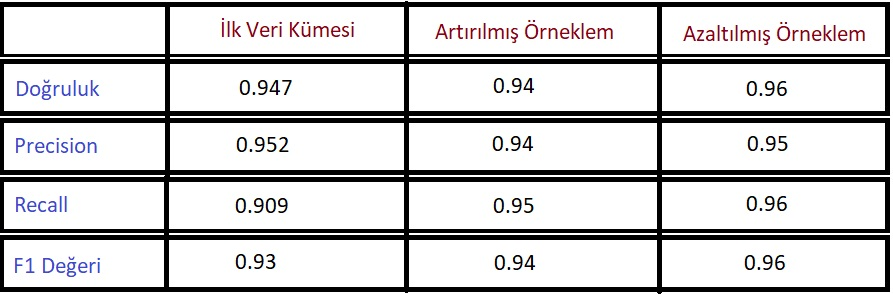

In [35]:
from IPython.display import Image
Image(filename = "tablo2.jpg", width=600, height=600)

İlk bakışta azaltılmış örneklem iyi gibi duruyor ancak test kümesinin değerlerine de bakınca aralarında ciddi manada fark bulunmaktadır.İlk veri kümesi ve artırılmış örneklem değerleri birbirine yakın gözüküyor. İkisi de seçilebilir. Ancak recall değerine bakınca artırılmış örneklem değeri gerçekten çok iyi çıkmış.O sebeple bunu seçebiliriz.

**Sentetik örneklem üretme yöntemlerinden iki tanesi de SMOTE ve ADASYN'dir.Şimdi bunları deneyelim.**

In [36]:
from imblearn.over_sampling import SMOTE

y = breast_cancer.diagnosis
X = breast_cancer.drop('diagnosis', axis=1)

sm = SMOTE(random_state=27)
X_smote, y_smote = sm.fit_resample(X, y)
model_olustur(X_smote, y_smote)

Modelin doğruluk değeri :  0.965034965034965
----------------------------------------------------------
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       285
           1       0.95      0.93      0.94       286

    accuracy                           0.94       571
   macro avg       0.94      0.94      0.94       571
weighted avg       0.94      0.94      0.94       571

Test veri kümesi
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.97      0.96      0.96        71

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.97       143
weighted avg       0.97      0.97      0.97       143



In [37]:
from imblearn.over_sampling import ADASYN
y = breast_cancer.diagnosis
X = breast_cancer.drop('diagnosis', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_resample(X, y)
model_olustur(X_adasyn, y_adasyn)

Modelin doğruluk değeri :  0.916083916083916
----------------------------------------------------------
Eğitim veri kümesi
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       286
           1       0.91      0.92      0.91       286

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.91      0.91      0.91       572

Test veri kümesi
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        71
           1       0.92      0.92      0.92        72

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143



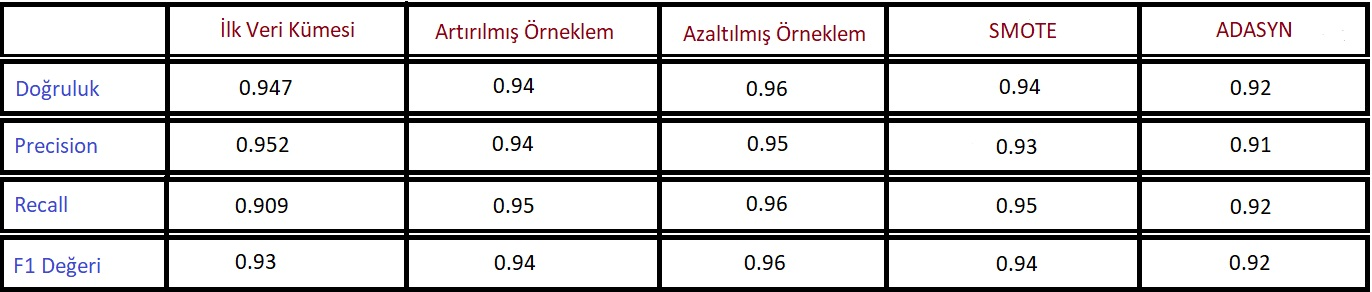

In [38]:
Image(filename = "tablo3.jpg", width=800, height=800)

**5 farklı veri değerlerine bakınca yine artırılmış örneklem en iyisi gibi gözükmektedir.**

### Çapraz Doğrulama ve Hiperparametre Ayarlama

In [39]:
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [40]:
y = breast_cancer.diagnosis
X = breast_cancer.drop('diagnosis', axis=1)
print(len(X), len(y))

569 569


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Eğitim veri kümesindeki satır sayısı :  {} ".format(len(X_train)))
print("Eğitim veri kümesindeki hedef sayısı :  {} ".format(len(y_train)))
print("Test veri kümesindeki satır sayısı :  {} ".format(len(X_test)))
print("Test veri kümesindeki hedef sayısı :  {} ".format(len(y_test)))

Eğitim veri kümesindeki satır sayısı :  455 
Eğitim veri kümesindeki hedef sayısı :  455 
Test veri kümesindeki satır sayısı :  114 
Test veri kümesindeki hedef sayısı :  114 


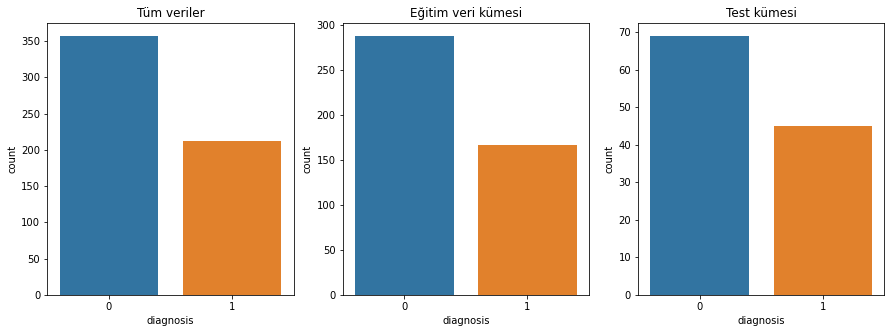

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(y)
plt.title("Tüm veriler")
plt.subplot(132)
sns.countplot(y_train)
plt.title("Eğitim veri kümesi")
plt.subplot(133)
sns.countplot(y_test)
plt.title("Test kümesi")
plt.show()

In [43]:
model = LogisticRegression()
model.fit(X_train, y_train)
tahmin_eğitim = model.predict(X_train)
tahmin_test = model.predict(X_test)
model.score(X_test, y_test)

0.9210526315789473

**Şimdi çapraz doğrulama yapalım.**

In [44]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1111)

In [45]:
parcalar = kf.split(X)
for num, (eğitim_index, test_index) in enumerate(parcalar):
    print("{}.Eğitim Kümesi Boyutu : {}".format(num+1,len(eğitim_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*27)

1.Eğitim Kümesi Boyutu : 455
1.Test Kümesi Boyutu   : 114
---------------------------
2.Eğitim Kümesi Boyutu : 455
2.Test Kümesi Boyutu   : 114
---------------------------
3.Eğitim Kümesi Boyutu : 455
3.Test Kümesi Boyutu   : 114
---------------------------
4.Eğitim Kümesi Boyutu : 455
4.Test Kümesi Boyutu   : 114
---------------------------
5.Eğitim Kümesi Boyutu : 456
5.Test Kümesi Boyutu   : 113
---------------------------


In [46]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()

pieces = kf.split(X)
score_list = []

for a, (train_index, test_indeks) in enumerate(pieces):
    X_train, y_train = X.iloc[train_index], y.iloc[train_index]

    X_test, y_test = X.iloc[test_index], y.iloc[test_index]

    
    model2.fit(X_train, y_train)
    
    prediction = model2.predict(X_test)
    
    score = model.score(X_test, y_test)  
    score_list.append(score)
    
    print("Piece No.{} score: {:.8f}".format(a+1,score))
    print("-"*23, "\n")

Piece No.1 score: 0.92920354
----------------------- 

Piece No.2 score: 0.92920354
----------------------- 

Piece No.3 score: 0.92920354
----------------------- 

Piece No.4 score: 0.92920354
----------------------- 

Piece No.5 score: 0.92920354
----------------------- 



In [47]:
print("Mean score : {:.2f}".format(np.mean(score_list)))

Mean score : 0.93


In [48]:
from sklearn.model_selection import cross_validate, cross_val_score
log_reg_model = LogisticRegression()

cv = cross_validate(estimator=log_reg_model,
                    X=X,
                    y=y,
                    cv=10,
                    return_train_score=True,
                   )

print('Train Scores :', cv['train_score'], sep = '\n')
print("-"*50)
print('Test Scores     :', cv['test_score'], sep = '\n')

Train Scores :
[0.9453125  0.95117188 0.95703125 0.95117188 0.95507812 0.9453125
 0.94335938 0.95117188 0.95117188 0.96101365]
--------------------------------------------------
Test Scores     :
[0.92982456 0.92982456 0.92982456 0.92982456 0.96491228 0.96491228
 0.92982456 0.92982456 0.92982456 0.96428571]


In [49]:
print('Mean score of train set : ', cv['train_score'].mean())
print('Mean score of test set  : ', cv['test_score'].mean())

Mean score of train set :  0.9511794895224173
Mean score of test set  :  0.9402882205513784


In [50]:
cv = cross_val_score(estimator=log_reg_model,
                     X=X,
                     y=y,
                     cv=10,
                    )

print('Model Scores : ', cv, sep = '\n')
print("Mean score : {:.2f}".format(np.mean(cv)))

Model Scores : 
[0.92982456 0.92982456 0.92982456 0.92982456 0.96491228 0.96491228
 0.92982456 0.92982456 0.92982456 0.96428571]
Mean score : 0.94


15 adet tahmin yaptıralım.

In [51]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(estimator=log_reg_model,
                           X=X,
                           y=y,
                           cv=10,
                          )
print(y_pred[0:15])

[1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]


**Şimdi parametreleri değiştirerek deneyelim.**

*Grid Search yapalım.*

In [52]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(estimator=log_reg_model,
                       param_grid = parameters,
                       cv = 10
                      )

grid_cv.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [53]:
print("Best Parameters : ", grid_cv.best_params_)
print("Best Score      : ", grid_cv.best_score_)

Best Parameters :  {'C': 1000, 'penalty': 'l2'}
Best Score      :  0.9490601503759398


In [54]:
results = grid_cv.cv_results_

df = pd.DataFrame(results)
df = df[['param_penalty','param_C', 'mean_test_score']]
df = df.sort_values(by='mean_test_score', ascending = False)
df.head(5)

,param_penalty,param_C,mean_test_score
17,l2,1000,0.949060
13,l2,10,0.942043
19,l2,10000,0.942043
9,l2,0.1,0.940288
11,l2,1,0.940288


**En iyi değerler c:1000 ve L2 iken çıktı.**

*Random Search yapalım.*

In [55]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
              "penalty": ['l1', 'l2']
             }
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=log_reg_model,
                           param_distributions = parameters,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )

rs_cv.fit(X, y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [56]:
print("Best parameters      : ", rs_cv.best_params_, "\n")
print("All precision values : ", rs_cv.cv_results_['mean_test_score'], "\n")
print("Best precision value : ", rs_cv.best_score_)

Best parameters      :  {'penalty': 'l2', 'C': 0.001} 

All precision values :  [0.94276743 0.94776743 0.93553642 0.93383622        nan 0.94510352
        nan        nan        nan        nan] 

Best precision value :  0.947767425810904


In [57]:
results_rs = rs_cv.cv_results_

df_rs = pd.DataFrame(results_rs)
df_rs = df_rs[['param_penalty','param_C', 'mean_test_score']]
df_rs = df_rs.sort_values(by='mean_test_score', ascending = False)

df_rs.head(5)

,param_penalty,param_C,mean_test_score
1,l2,0.001,0.947767
5,l2,1000,0.945104
0,l2,0.0001,0.942767
2,l2,10,0.935536
3,l2,1,0.933836


**En iyi değerleri c = 0.001 penalty=L2 iken verdi.**

**Grid Search'de mean test score çok az miktar daha iyi çıktı.**

## Supervised Machine Learning algoritmalarını deneyerek modelimizi geliştirmeye çalışalım.

### KNN İle Sınıflandırma

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [59]:
knn.score(X_test, y_test)

0.9380530973451328

Çapraz doğrulama yapalım.

In [134]:
from sklearn.model_selection import cross_val_score

cvscores_2 = cross_val_score(knn, X_test, y_test, cv=2)
print('cv =  2 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_2)))

cvscores_5 = cross_val_score(knn, X_test, y_test, cv=5)
print('cv = 5 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_5)))

cvscores_18 = cross_val_score(knn, X_test, y_test, cv=18)
print('cv = 18 ---> Ortalama çarpraz doğrulama skoru : {:.2f} '.format(np.mean(cvscores_18)))

cv =  2 ---> Ortalama çarpraz doğrulama skoru : 0.86 
cv = 5 ---> Ortalama çarpraz doğrulama skoru : 0.92 
cv = 18 ---> Ortalama çarpraz doğrulama skoru : 0.91 


Çapraz doğrulama yaptığımızda en yüksek skor olarak 0.92 elde ettik.

Ağırlıklandırma ile de deneyelim.

In [61]:
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

X_zscore = stats.zscore(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_zscore, y, test_size=0.2, random_state = 40)

knn.fit(X_train,y_train)
knn.score(X_test, y_test)

0.9912280701754386

**Müthiş bir doğruluk değeri elde ettik!**

### Karar Ağaçları İle Sınıflandırma

In [62]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [63]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=4,
    random_state = 1337
)

In [64]:
karar_agaci.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=1337)

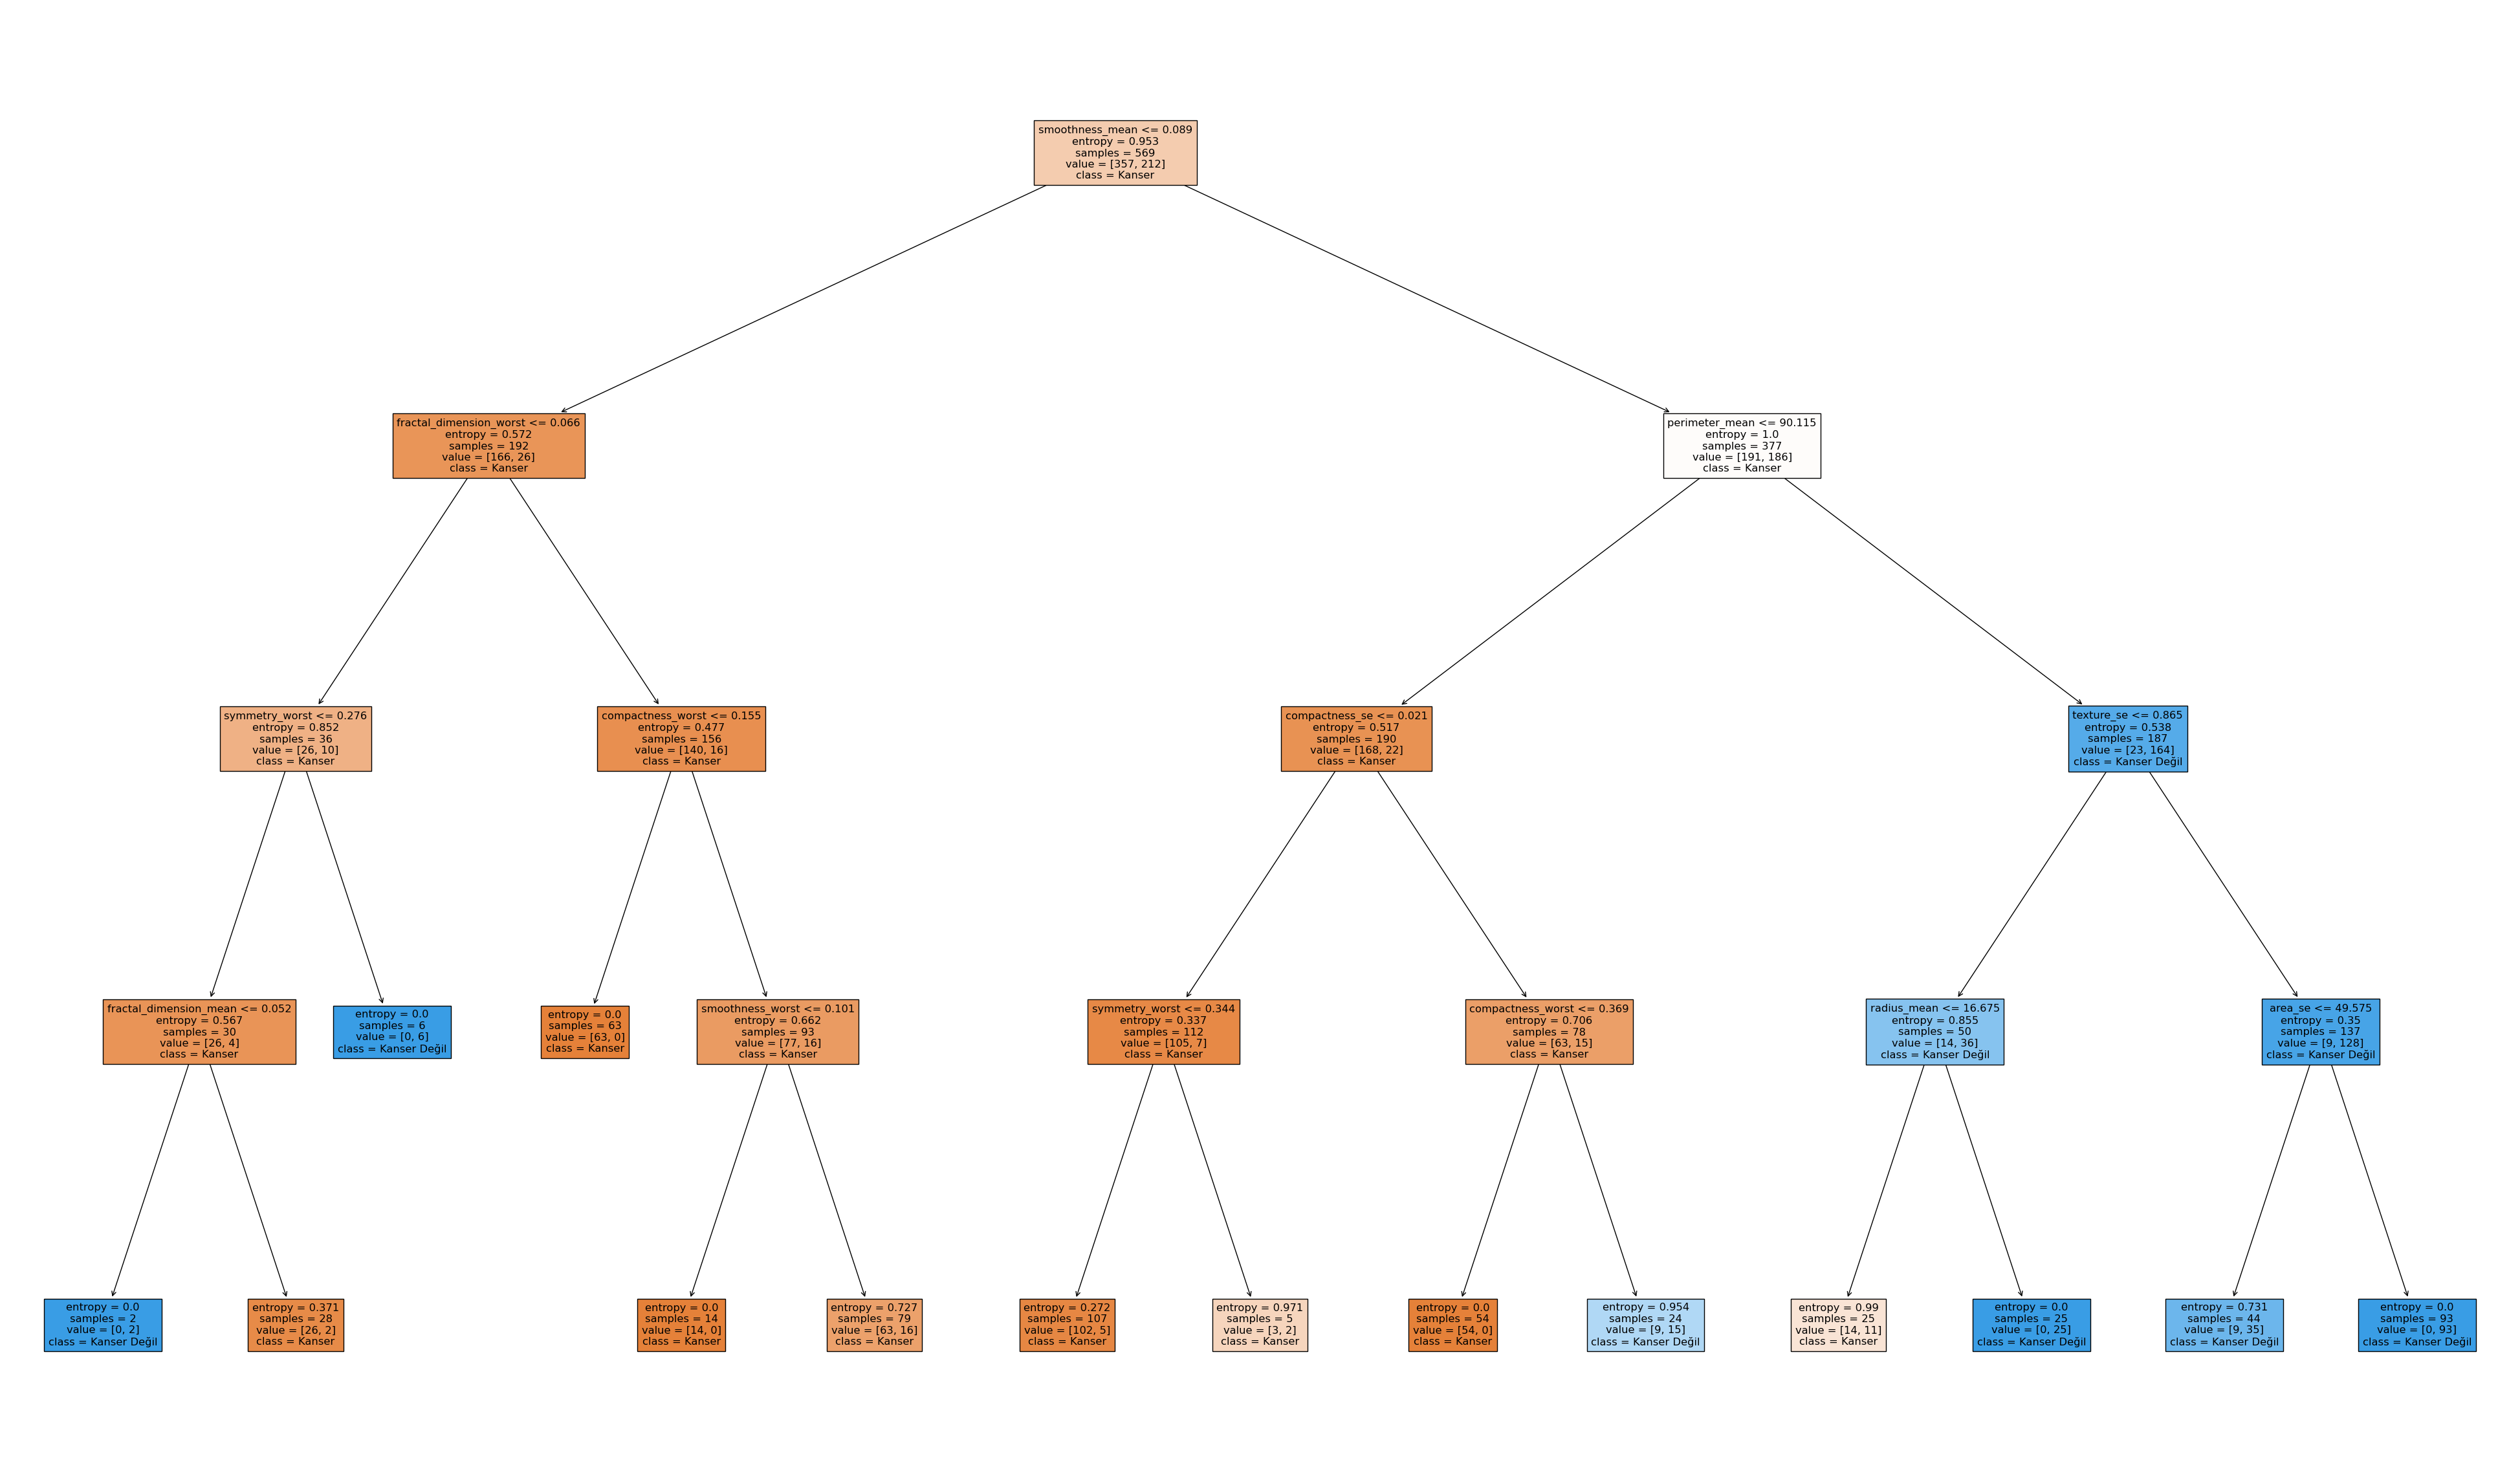

In [65]:
from sklearn import tree
plt.figure(figsize=(50, 30), dpi=100)
tree.plot_tree(decision_tree = karar_agaci,
               feature_names=X.columns,
               class_names=['Kanser', 'Kanser Değil'],
               filled = True
              )
plt.show()

In [66]:
kanser_karar_agaci = DecisionTreeClassifier(criterion='entropy', max_features=1,
                                     max_depth=4,random_state = 100)
kanser_karar_agaci.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=1,
                       random_state=100)

In [67]:
from sklearn.metrics import accuracy_score
y_tahmin_ka = kanser_karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.82


**Karar ağacıyla %82 doğruluk değeri elde ettik. Diğerlerine göre düşük bir doğruluk değeri.**

Bir kaç parametre değerini değiştirerek yeni değerler elde edelim.

In [68]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=3,
    max_depth=6,
    random_state = 1337
)

In [69]:
karar_agaci.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_features=3,
                       random_state=1337)

In [70]:
y_tahmin_ka = kanser_karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.82


In [71]:
karar_agaci = DecisionTreeClassifier(
    criterion='entropy',
    max_features=2,
    max_depth=5,
    random_state = 1337
)

In [72]:
karar_agaci.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=2,
                       random_state=1337)

In [73]:
y_tahmin_ka = kanser_karar_agaci.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))

Karar Ağacı Doğruluk Değeri        : 0.82


Üç denemede de doğruluk değeri değişmedi.

### Random Forest İle Sınıflandırma

In [74]:
from sklearn.ensemble import RandomForestClassifier
rastgele_orman = RandomForestClassifier(n_estimators=25, random_state=2)
rastgele_orman.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=25, random_state=2)

In [75]:
y_tahmin_ro = rastgele_orman.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.96


**Yüzde 96 doğruluk değeri elde ettik.**

**Şimdi Random Search uygulayarak doğruluk değerinin değişimini gözlemleyelim.**

In [76]:
rf = RandomForestClassifier(random_state = 35)

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf,

param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(X,y)

# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'n_estimators': 20, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False}  



Şimdi elde ettiğimiz parametrelerle tekrar çalıştıralım.

In [77]:
y_tahmin_ro = rf_random.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_ro)))

Rastgele Orman Doğruluk Değeri : 0.75


**Random forest uyguladığımızda doğruluk değerimiz düştü.**

### Support Vector Machines (SVM) İle Sınıflandırma

In [78]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [79]:
y_tahmin = svc.predict(X_test)
print("Rastgele Orman Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin)))

Rastgele Orman Doğruluk Değeri : 0.97


**%97 doğruluk oranı elde ettik.**

Parametreleri değiştirerek deneyelim.

In [80]:
kernel_listesi = ['linear', 'rbf', 'poly']
for kernel in kernel_listesi:
    svc = SVC(kernel= kernel, C=1)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy with {} : {}'.format(kernel,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy with linear : 0.9736842105263158
------------------------------------
Accuracy with rbf : 0.9824561403508771
------------------------------------
Accuracy with poly : 0.9298245614035088
------------------------------------


**rbf kullandığımızda doğruluk yüzde 98 e çıktı.**

In [81]:
gamma_listesi = [10**a for a in range(-5,3)]
for gamma in gamma_listesi:
    svc = SVC(kernel='rbf',gamma=gamma)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy when gamma is: {} : {}'.format(gamma,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy when gamma is: 1e-05 : 0.6578947368421053
------------------------------------
Accuracy when gamma is: 0.0001 : 0.8333333333333334
------------------------------------
Accuracy when gamma is: 0.001 : 0.9824561403508771
------------------------------------
Accuracy when gamma is: 0.01 : 0.9912280701754386
------------------------------------
Accuracy when gamma is: 0.1 : 0.9824561403508771
------------------------------------
Accuracy when gamma is: 1 : 0.6578947368421053
------------------------------------
Accuracy when gamma is: 10 : 0.6578947368421053
------------------------------------
Accuracy when gamma is: 100 : 0.6578947368421053
------------------------------------


**Gamma değeri 0.01 olduğunda yüzde 99'a çıktı doğruluk değerimiz.**

In [82]:
c_listesi = [10**a for a in range(-2,4)]

for c in c_listesi:
    svc = SVC(kernel='rbf',C = c)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy when c is: {} : {}'.format(c,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy when c is: 0.01 : 0.6578947368421053
------------------------------------
Accuracy when c is: 0.1 : 0.9824561403508771
------------------------------------
Accuracy when c is: 1 : 0.9824561403508771
------------------------------------
Accuracy when c is: 10 : 0.9824561403508771
------------------------------------
Accuracy when c is: 100 : 0.956140350877193
------------------------------------
Accuracy when c is: 1000 : 0.956140350877193
------------------------------------


**C değeri 0.1,1 ve 10 iken en yüksek doğruluk değerlerini verdi.**

In [83]:
degree_listesi = [0.1,1,10,20,30,35,40]

for degree in degree_listesi:
    svc = SVC(kernel='poly',degree=degree)
    svc.fit(X_train, y_train)
    y_tahmin = svc.predict(X_test)
    print('Accuracy when degree is: {} : {}'.format(degree,accuracy_score(y_test, y_tahmin)))
    print("------------------------------------")

Accuracy when degree is: 0.1 : 0.6578947368421053
------------------------------------
Accuracy when degree is: 1 : 0.9824561403508771
------------------------------------
Accuracy when degree is: 10 : 0.8421052631578947
------------------------------------
Accuracy when degree is: 20 : 0.8157894736842105
------------------------------------
Accuracy when degree is: 30 : 0.8157894736842105
------------------------------------
Accuracy when degree is: 35 : 0.8333333333333334
------------------------------------
Accuracy when degree is: 40 : 0.7982456140350878
------------------------------------


**Degree 1 iken yüzde 98 doğruluk değerini verdi.**

Şimdi en iyi parametreleri hep beraber çalıştıralım.

In [84]:
svc = SVC(kernel='rbf',C=1,gamma = 0.01)
svc.fit(X_train, y_train)
y_tahmin = svc.predict(X_test)
print('Accuracy: {}'.format(accuracy_score(y_test, y_tahmin)))

Accuracy: 0.9912280701754386


**Doğruluk değerimizi % 99 olarak elde ettik.**

### XGBOOST İle Sınıflandırma

In [85]:
import xgboost as xgb
cancer_dmatrix = xgb.DMatrix(data=X, label=y)

In [86]:
params = {"objective":"reg:logistic", "max_depth":3}

In [87]:
cancer_cv = xgb.cv(dtrain=cancer_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="error", as_pandas=True, seed=123)
display(cancer_cv)

,train-error-mean,train-error-std,test-error-mean,test-error-std
0,0.025480,0.002451,0.066824,0.019564
1,0.021969,0.001257,0.061524,0.013876
2,0.014945,0.006589,0.056252,0.010004
3,0.012306,0.003300,0.052734,0.011418
4,0.010549,0.004314,0.054497,0.012485


In [88]:
print('Doğruluk Değeri : {:.3f}'.format((1-cancer_cv["test-error-mean"]).max()))

Doğruluk Değeri : 0.947


**Yüzde 94 doğruluk değeri elde ettik.**

In [89]:
cancer_auc = xgb.cv(dtrain=cancer_dmatrix, params=params, nfold=3, 
                    num_boost_round=5, metrics="auc", as_pandas=True, seed=123)
display(cancer_auc)
print('AUC Skoru : {:.3f}'.format(cancer_auc["test-auc-mean"].max()))

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.987225,0.001301,0.961473,0.024760
1,0.993244,0.004295,0.969078,0.022616
2,0.995224,0.003751,0.972491,0.024377
3,0.997125,0.002042,0.971354,0.025405
4,0.997610,0.001871,0.974002,0.026527


AUC Skoru : 0.974


**Yüzde 97 AUC skoru elde ettik.**

### LightGBM İle Sınıflandırma

In [90]:
import lightgbm as lgb
d_train = lgb.Dataset(X_train, label=y_train)

In [91]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 10,
          'force_row_wise':True,
          'verbose': -1
          ,
         }

In [92]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100, verbose_eval=False)

In [93]:
from sklearn.metrics import accuracy_score
y_tahmin=lgb_model.predict(X_test)
y_tahmin = [0 if tahmin < 0.5 else 1 for tahmin in y_tahmin]
dogruluk=accuracy_score(y_tahmin,y_test)
dogruluk

0.9473684210526315

**%94.7 doğruluk değeri elde ettik.**

In [94]:
params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : 5,
          'force_row_wise':True,
          'verbose': -1
          ,
         }

In [95]:
lgb_model = lgb.train(params, d_train, num_boost_round = 100, verbose_eval=False)
y_tahmin=lgb_model.predict(X_test)
y_tahmin = [0 if tahmin < 0.5 else 1 for tahmin in y_tahmin]
dogruluk=accuracy_score(y_tahmin,y_test)
dogruluk

0.956140350877193

**Derinliği düşürdüğümüzde doğruluk %95.6'ya çıktı.Bir kaç derinlik deneyelim.**

In [96]:
derinlik = [a for a in range(1,15)]
for depth in derinlik:
    params = {'boosting_type' : 'gbdt',
          'objective' : 'binary',
          'metric' : 'binary_logloss',
          'sub_feature' : 0.5,
          'num_leaves' :  10,
          'min_data' : 50,
          'max_depth' : depth,
          'force_row_wise':True,
          'verbose': -1
          ,
         }
    lgb_model = lgb.train(params, d_train, num_boost_round = 100, verbose_eval=False)
    y_tahmin=lgb_model.predict(X_test)
    y_tahmin = [0 if tahmin < 0.5 else 1 for tahmin in y_tahmin]
    dogruluk=accuracy_score(y_tahmin,y_test)
    print("Accuracy when depth is {}:{}".format(depth,dogruluk))

Accuracy when depth is 1:0.956140350877193
Accuracy when depth is 2:0.9649122807017544
Accuracy when depth is 3:0.956140350877193
Accuracy when depth is 4:0.9473684210526315
Accuracy when depth is 5:0.956140350877193
Accuracy when depth is 6:0.956140350877193
Accuracy when depth is 7:0.9473684210526315
Accuracy when depth is 8:0.9473684210526315
Accuracy when depth is 9:0.9473684210526315
Accuracy when depth is 10:0.9473684210526315
Accuracy when depth is 11:0.9473684210526315
Accuracy when depth is 12:0.9473684210526315
Accuracy when depth is 13:0.9473684210526315
Accuracy when depth is 14:0.9473684210526315


**Derinlik 2 iken max doğruluk %96.4 oldu.**

## Unsupervised Machine Learning algoritmalarını deneyerek modelimizi geliştirmeye çalışalım.

### KMeans Algoritması

In [97]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [98]:
breast_cancer = pd.read_csv('Breast_Cancer_Wisconsin.csv')

In [99]:
breast_cancer.drop(columns=['id', 'Unnamed: 32'], axis=1,inplace=True)

In [100]:
breast_cancer["diagnosis"] = breast_cancer.diagnosis.replace({'M':1, "B":0})

In [101]:
breast_cancer.drop([0], axis=0, inplace=True)

In [102]:
y = breast_cancer['diagnosis']
X = breast_cancer.drop(columns=['diagnosis'], axis=1)

In [103]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

X_yarı1, X_yarı2, X_pcayarı1, X_pcayarı2 = train_test_split(
    X_std,
    X_pca,
    test_size=0.5,
    random_state=13579)

In [104]:
ytahmin = pd.DataFrame()

for counter, data in enumerate([
    (X_yarı1, X_pcayarı1),
    (X_yarı2, X_pcayarı2)]):
    
    ytahmin['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ytahmin['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 5):
        tahmin = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[counter])
        ytahmin['clust' + str(nclust) + '_sample' + str(counter)] = tahmin

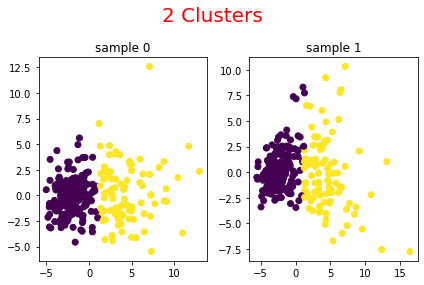

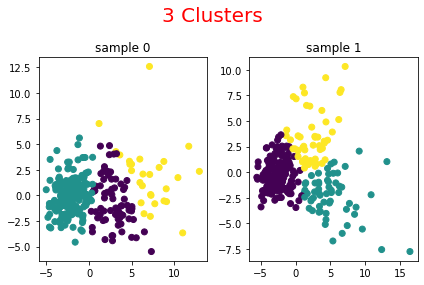

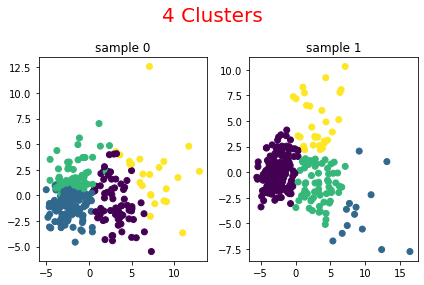

In [105]:
for cluster in range(2, 5):
    
    f, axarr = plt.subplots(1, 2)
    
    for i in range(2):
        
        x_sub = ytahmin['pca_f1_sample{}'.format(i)]
        y_sub = ytahmin['pca_f2_sample{}'.format(i)]
        
        c = ytahmin['clust{}_sample{}'.format(cluster, i)]
        
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
    
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20 , color = 'red')
    plt.tight_layout()
    plt.show()
    print('\n')


2 ve 3'te güzel ayrılmışlar gibi gözüküyor.Ancak biz sonuç olarak 2'ye ayrılması gerektiğini bildiğimiz için 2 cluster'dan devam edeceğiz.

**2 değeri için ARI puanına,rand index skoruna ve siluet skoruna bakalım.**

In [106]:
tam_tahmin = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)

In [107]:
pd.crosstab(y, tam_tahmin) 

col_0,0,1
diagnosis,,
0,18,339
1,176,35


In [108]:
tam_tahmin = np.array([0 if x == 1 else 1 for x in tam_tahmin])

pd.crosstab(y, tam_tahmin) 

col_0,0,1
diagnosis,,
0,339,18
1,35,176


In [109]:
metrics.adjusted_rand_score(y, tam_tahmin)

0.6588181173986278

**0'ın rastgele etiketlenmeyi ve 1'in temel gerçeğin mükemmel bir şekilde kopyalandığını gösterir. Buradaki sonuca baktığımızda, değerlerin mükemmel bir şekilde kopyalanmış olduğunu gösteriyor.** 

In [110]:
def rand_index_score(grount_truths, predictions):
    tp_plus_fp = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    tp_plus_fn = scipy.special.comb(np.bincount(grount_truths), 2).sum()
    A = np.c_[(grount_truths, predictions)]
    tp = sum(scipy.special.comb(np.bincount(A[A[:, 0] == i, 1]), 2).sum()
             for i in set(grount_truths))
    fp = tp_plus_fp - tp
    fn = tp_plus_fn - tp
    tn = scipy.special.comb(len(A), 2) - tp - fp - fn
    return (tp + tn) / (tp + fp + fn + tn)
rand_index_score(y, tam_tahmin)

0.8477035049805003

**Rand indeks değeri de güzel çıktı.**

In [111]:
etiketler = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, etiketler, metric='euclidean'))

0.3426652786060993


**Değerler çok kötü kümelenmeler için -1 ile çok yoğun kümelenmeler için +1 arasında olur.Bizim Siluet değerimiz 1 e daha yakın çıktı.**

**Hierarchcal Clustering yapalım.**

**Farklı linkage yöntemlerini deneyelim.**

In [112]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

linkages = ('complete','ward','average')
for link in linkages:
    agg_küme = AgglomerativeClustering(linkage=link, 
                                      n_clusters=2)

    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print('for "{}"'.format(link))
    print("ARI: {} "
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))
    print("-------------------------------------")

for "complete"
ARI: 0.004892942250054813 
The silhoutte score: 0.6622296298876258
-------------------------------------
for "ward"
ARI: 0.6421416213162744 
The silhoutte score: 0.3251533514723625
-------------------------------------
for "average"
ARI: 0.0073730911760034835 
The silhoutte score: 0.6355669390410796
-------------------------------------


**En iyi ARI skorunu ward'da elde ettik. En düşük silhoutte skorun ward'da çıkmasının sebebi, ward'ın iki sınıfı birbirinden iyi şekilde farklılaştırmasıdır.**

Bir de dendogram çizdirelim.

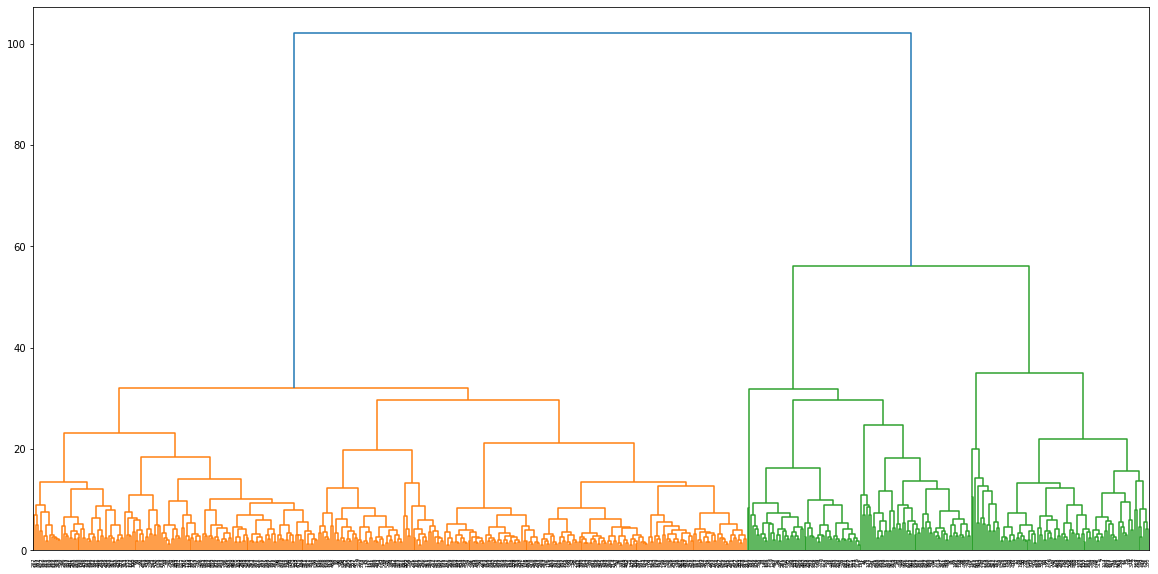

In [113]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

### DBSCAN İle Çalışalım.

In [114]:
from sklearn.cluster import DBSCAN
dbscan_cluster = DBSCAN(eps=2, min_samples=5)

clusters = dbscan_cluster.fit_predict(X_std)

In [115]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.0959483306061618


In [116]:
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün siluet skoru: -0.19362006932672907


eps ve min sample sayılarını değiştirelim.

In [117]:
dbscan_cluster = DBSCAN(eps=3, min_samples=4)

clusters = dbscan_cluster.fit_predict(X_std)

In [118]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.1326990349568087
DBSCAN çözümünün siluet skoru: 0.3128561921077031


Değerler bir miktar arttı. Siluet skor eksili değerlerden çıkıp 0.312'e geldi.

In [119]:
dbscan_cluster_i = DBSCAN(eps=3, min_samples=33)

clusters_i = dbscan_cluster_i.fit_predict(X_std)

In [120]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters_i)))
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters_i, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.3910080201182092
DBSCAN çözümünün siluet skoru: 0.26118437684508655


In [121]:
dbscan_cluster = DBSCAN(eps=5, min_samples=33)

clusters = dbscan_cluster.fit_predict(X_std)

In [122]:
print("DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): {}"
      .format(metrics.adjusted_rand_score(y, clusters)))
print("DBSCAN çözümünün siluet skoru: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

DBSCAN çözümünün Düzeltilmiş Rand Endeksi (ARI): 0.02230732376290327
DBSCAN çözümünün siluet skoru: 0.45703475992939757


**En iyi sonucu eps=3, min_samples=33 iken verdi.**

### GMM İle Çalışalım.

In [123]:
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse
gmm_cluster = GaussianMixture(n_components=2, random_state=123)
clusters = gmm_cluster.fit_predict(X_std)

In [124]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI: 0.774
GMM çözümünün siluet skoru 0.31447348038176276


**ARI ve siluet skor sonuçlarımız güzel çıktı.**

covariance_type parametresini değiştirerek sonuçların nasıl değiştiğine bakalım.

In [125]:
gmm_cluster_tied = GaussianMixture(n_components=2, random_state=123 ,covariance_type = 'tied' )

In [126]:
clusters_tied = gmm_cluster_tied.fit_predict(X_std)

In [127]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_tied)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_tied, metric='euclidean')))

ARI: 0.699
GMM çözümünün siluet skoru 0.3317971094690334


ARI değerimiz düştü.Siluet skor bir miktar yükseldi.

In [128]:
gmm_cluster_diag = GaussianMixture(n_components=2, random_state=123 ,covariance_type = 'diag' )

In [129]:
clusters_diag = gmm_cluster_diag.fit_predict(X_std)

In [130]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_diag)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_diag, metric='euclidean')))

ARI: 0.677
GMM çözümünün siluet skoru 0.31573581776303683


İki değerimiz de düştü.

In [131]:
gmm_cluster_spherical = GaussianMixture(n_components=2, random_state=123 ,covariance_type = 'spherical' )

In [132]:
clusters_spherical= gmm_cluster_spherical.fit_predict(X_std)

In [133]:
print("ARI: {:.3f}".format(metrics.adjusted_rand_score(y, clusters_spherical)))
print("GMM çözümünün siluet skoru {}".format(metrics.silhouette_score(X_std, clusters_spherical, metric='euclidean')))

ARI: 0.555
GMM çözümünün siluet skoru 0.30956500577842255


Ciddi miktarda bir düşüş gözlemlendi.

**Default olarak da 'full' kullanılmıştır. Hepsinin sonucuna baktığımızda en iyi sonucu 'full'ün verdiğini görmekteyiz.**